<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass/Clustering_Demo11_15_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import pylab as plt

In [4]:
url ="https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [12]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [13]:
year = "Year Built"
elec = "Electricity Use - Grid Purchase (kBtu)"
features = df[[year, elec]]

In [ ]:
features.info

In [15]:
features.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
features.isna().sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f0761a10>,
      dtype=object)

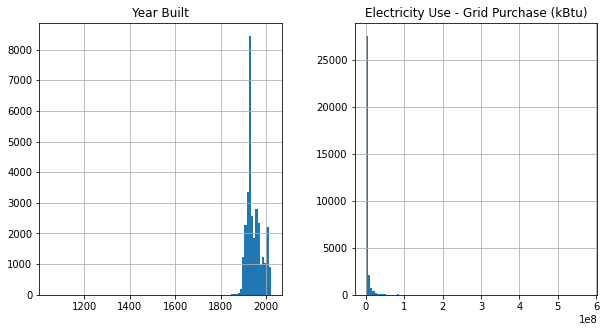

In [19]:
features.hist(figsize=(10, 5), bins=100)

In [20]:
features = features[features[year] >1900]
features = features[features[elec] >0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f0761a50>,
      dtype=object)

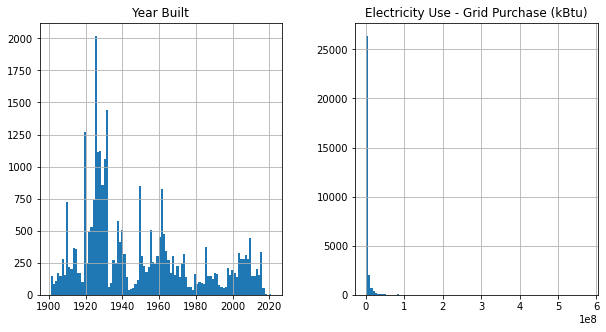

In [21]:
features.hist(figsize=(10, 5), bins=100)

In [22]:
features[elec] = np.log10(features[elec])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6efc07590>,
      dtype=object)

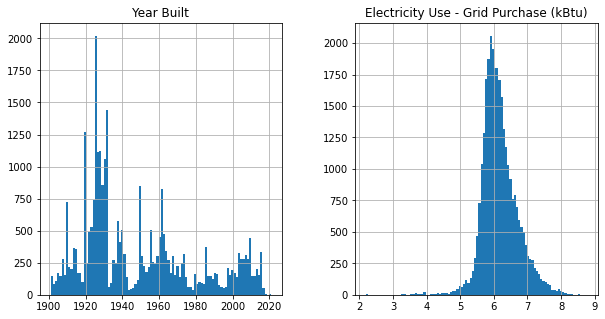

In [23]:
features.hist(figsize=(10, 5), bins=100)

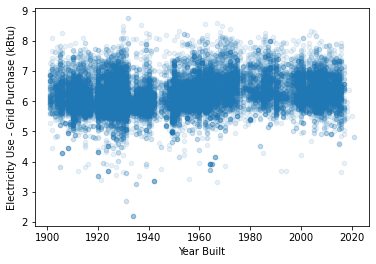

In [26]:
features.plot(year, elec, kind="scatter", alpha =0.1);

In [27]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters =7, random_state = 223, verbose =1)

In [32]:
km.fit(features)

Initialization complete
Iteration 0, inertia 688651.1947585631
Iteration 1, inertia 594130.50012219
Iteration 2, inertia 577361.7938243994
Iteration 3, inertia 571391.6795366446
Iteration 4, inertia 564344.0093392557
Iteration 5, inertia 560897.799243411
Iteration 6, inertia 560143.6265162502
Iteration 7, inertia 558804.5065221481
Iteration 8, inertia 555563.9497735947
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 724719.4710527833
Iteration 1, inertia 522183.0194929306
Iteration 2, inertia 514763.0255863754
Iteration 3, inertia 512382.354364533
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 628469.9943911107
Iteration 1, inertia 545261.3525173855
Iteration 2, inertia 533367.4512370464
Iteration 3, inertia 526140.8042318972
Converged at iteration 3: center shift 0.0025371785956653957 within tolerance 0.04689654968509463.
Initialization complete
Iteration 0, inertia 643188.3961010517
Iteration 1, in

KMeans(n_clusters=7, random_state=223, verbose=1)

In [33]:
km.n_clusters

7

In [34]:
km.cluster_centers_

array([[1938.43505535,    5.98922143],
       [2007.30286786,    6.35988119],
       [1926.24497476,    6.02057293],
       [1965.88762136,    6.37374902],
       [1910.55898794,    6.13874665],
       [1987.02498799,    6.47457785],
       [1953.12349398,    6.18840765]])

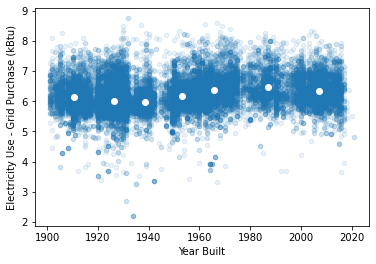

In [37]:
features.plot(year, elec, kind="scatter", alpha = 0.1);
for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc, 0], km.cluster_centers_[cc, 1], "wo")

In [39]:
km.labels_

array([4, 3, 1, ..., 2, 4, 5], dtype=int32)

In [41]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

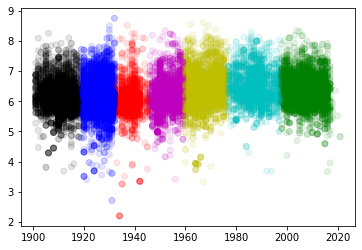

In [43]:
clrs = np.array(["r", "g", "b", "y", "k", "c","m"])
plt.scatter(features[year], features[elec], alpha = 0.1, color=clrs[km.labels_])

In [44]:
features = (features - features.mean())/ features.std()

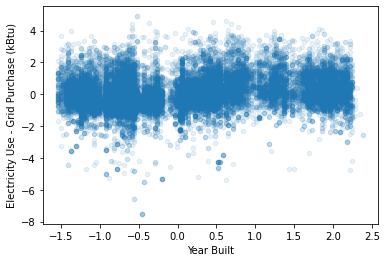

In [45]:
features.plot(year, elec, kind="scatter", alpha = 0.1)

In [50]:
km2 = KMeans(n_clusters= 3, random_state = 750)
km2.fit(features)

KMeans(n_clusters=3, random_state=750)

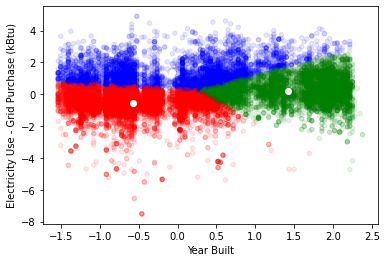

In [51]:
clrs = np.array(["r", "g", "b", "y", "k", "c","m"])

features.plot(year, elec, kind="scatter", alpha = 0.1, color = clrs[km2.labels_]);
for cc in range(km2.n_clusters):
  plt.plot(km2.cluster_centers_[cc, 0], km2.cluster_centers_[cc, 1], "wo")